# <font color=#80B900> **Project** </font>
## <font color=#80B900> MU4MA066 - Optimisation numérique et science des données</font>

In [46]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import random

<font color=#80B900> ===================================================================================================================</font>

**These functions aim to facilitate the progress of the project development**

This function generates a summary plot that includes the original signal as well as the outputs of the denoising method with different lambda values, all in the same plot:

In [47]:
def summary_plot(x_lambd,n_lambd,lambd,t,y,title,ax_,mu_):
  """
  x_lambd : 4 x N-dimensional array. Stores the minimun (x) for each lambda
  n_lambd : 4 x N-dimensional array. Stores numbers iteration for each lambda
  lambd   : array with the value of the lambdas
  t       : time
  y       : signal
  title   : Global title
  """
  
  colors=["#FF8000","#A724CC","#c90076","#196A7D"]
  
  #--------------------------> Global plot
  ax_.plot(t,y,color="#8fce00",label="Noisy")
  ax_.set_xlabel("T")
  ax_.set_ylabel("y")

  #--------------------------> Different lambdas
  for i in range(len(lambd)):
    ax_.plot(t,x_lambd[i],color=colors[i],label=fr"$\lambda$ = {lambd[i]:.1f} | Num. iter: {n_lambd[i]}")

  if(mu_!=0):
    ax_.set_title(fr"$\mu$ = {mu_:.3f}",fontsize=10)    
    
  ax_.legend(loc='upper right', fontsize='small')

  fig.suptitle(title, fontweight='bold',y=1)
  #fig.show()

This function takes a matrix as input and transforms it into a vector (used for the implementation of exercise 2):

In [48]:
def mat_to_vet (u):
  """
  u : Matriz m x n
  """
  if u.ndim<=1:
    return u
  else:
    result = []
    for i in range(u.shape[1]):
      col_vec = u[:, i]
      result=np.append(result,col_vec)
  return result #vector (m*n)x1 

This function generates a summary plot for 2D arrays (images) with corresponding titles:


In [49]:
def summary_plot_2D(arrays_2D,titles):
  """
  arrays_2D : Image
  titles    : Image title
  """
  num_fig=len(arrays_2D)

  fig, axs = plt.subplots(nrows=1, ncols=len(titles), figsize=(int(num_fig/0.3), int(num_fig/0.6)))
  for index, ax in enumerate(axs):
      ax.imshow(arrays_2D[index], cmap="gray")
      ax.set_title(titles[index],fontsize=10)
  plt.show()

<font color=#80B900> ===================================================================================================================</font>

# <font color=#80B900> **Exercise 1:** Remove noise from a signal </font>

**Objective:** 

Given the following cost function $f(x)= \frac{1}{2}\sum_{i=1}^{N}(x_i-y_i)^2 +  \frac{\lambda}{2}\sum_{i=1}^{N-1}(x_{i+1}-x_i)^2$, we aim to solve:

<font color=#80B900> $$ \min_{x \in \mathbb{R}^N} f(x)$$ </font>

where $f: \mathbb{R}^N \longrightarrow \mathbb{R} \cup \{ \infty  \}$.

An equivalent representation is $f(x)=\frac{1}{2}\left\| x - y \right\|^2 + \frac{\lambda}{2} \left\| Dx \right\|^2$ where $D$ is a matrix $D \in \mathcal{M}_{N-1,N}(\mathbb{R})$



### <font color=#80B900> **1.1.** </font>
If $x \in \mathbb{R} ^ 4$, the matriz $D \in \mathcal{M}_{3,4}(\mathbb{R})$ is:

$$D=\begin{bmatrix}
-1 & 1 & 0 & 0 \\
0 & -1 & 1 & 0 \\
0 & 0 & -1 & 1 
\end{bmatrix}$$

The function `D_mat(N)` defined below calculates the matrix $D$ for any given dimension $N$:

In [50]:
def D_mat(N):
  D=np.zeros((N-1, N))
  for i in range(0,N-1):
    for j in range(0,N):
      if(i==j):
        D[i,j]=-1
        D[i,j+1]=1
        break;
  return D

In [51]:
D_mat(4)

array([[-1.,  1.,  0.,  0.],
       [ 0., -1.,  1.,  0.],
       [ 0.,  0., -1.,  1.]])

### <font color=#80B900> **1.2.** </font>
The function $f(x)$ has two constants: $y$ and $\lambda$. 

The function `f(y, lambda)` depends on these values and returns *a function* $f$.

When `f(y, lambda)(x)` is executed, the function $f(x)$ is calculated.


In [52]:
def f(y,lambd):
  def f_(x):
    N=x.size
    return 1/2*norm((x-y), ord=2)**2+lambd/2*norm(D_mat(N)@x, ord=2)**2
  return f_ 

$f$ is differentiable: 

\begin{align*}
f(x+h) &= \frac{1}{2}\left\| (x+h) - y \right\|^2 + \frac{\lambda}{2} \left\| D(x+h) \right\|^2\\ 
&= \frac{1}{2}\left\| (x-y) +h \right\|^2 + \frac{\lambda}{2} \left\| Dx+Dh \right\|^2\\
&= \frac{1}{2}\left\{ \left\| (x-y)\right\|^2 +2 \left\langle  x-y, h\right\rangle +\left\|h \right\|^2 \right\} + \frac{\lambda}{2} \left\{ \left\| Dx \right\|^2 + 2 \left\langle Dx,Dh \right\rangle+ \left\|Dh \right\|^2 \right\}\\
&=f(x)+\left\langle x-y,h \right\rangle + \lambda \left\langle Dx,Dh \right\rangle +O(\left\| h \right\|^2)\\
&=f(x)+\left\langle \color{#80B900}{(x-y)+\lambda D^\text{T}Dx},h \right\rangle +O(\left\| h \right\|^2)\\
&=f(x)+\color{#80B900}{df(x)}\cdot h+O(\left\| h \right\|^2)
\end{align*}

therefore, the gradient of the function $f(x)$ is:

$$df(x) = \nabla f(x) = x-y + \lambda D^\text{T}Dx$$

Similar to the previous function, executing `grad_f(y, lambda)(x)` calculates the gradient of $f(x)$, i.e., $\nabla f(x)$

In [53]:
def grad_f(y,lambd):
  def grad_f_(x):
    N=x.size
    return x-y+lambd*((D_mat(N)).T)@D_mat(N)@x
  return grad_f_

### <font color=#80B900> **1.3.** </font>
**Noisy signal**

In [54]:
def generate_signal(N,sigma=0.05):
  t = np.linspace(0,1,N)
  t1 = 0.1+0.25*np.random.random()
  t2 = 0.35+0.25*np.random.random()
  yi = np.array([-0.1,0.8,0.2])
  y = np.zeros(N)
  for i in range(y.size):
    if t[i]<=t1:
      y[i]=yi[0]
    elif t[i]>t1 and t[i]<=t2:
      y[i] = yi[1]
    else:
      y[i] = yi[2]
  y += sigma*(2*np.random.random(y.size)-1)
  return t,y

In [55]:
N = 100
t,y=generate_signal(N)

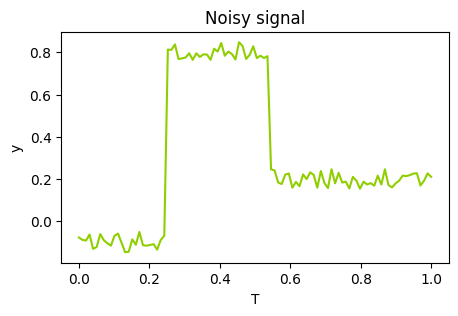

In [56]:
plt.figure(figsize=(5, 3))  
plt.plot(t,y,color="#8fce00")
plt.xlabel("T")
plt.ylabel("y")
plt.title("Noisy signal")
plt.show()

<font color=#80B900> ===================================================================================================================</font>

In **exercise 1**, the following parameters are kept constant and will not be modified:

*   Stop criterion: $\left| x_{k+1}-x_k \right| \le \epsilon$
*   Precision: $\epsilon = 1e-5$
*   Maximum number of iterations: 6000

In [57]:
eps=1e-5 
Nmax=6000

<font color=#80B900> ===================================================================================================================</font>

### <font color=#80B900> **1.4.**</font>
The objective is to find $x^*$, the solution to the optimization problem:

$$x^*=\arg\min_{x \in \mathbb{R}^N} f(x)$$

through <font color=#80B900> the *fixed* step gradient method </font> :
$$x_{k+1}=x_k - \alpha \nabla f(x_k)$$



In [58]:
def gradient_met(grad_f, x0, alpha, eps, Nmax):
  """
  grad_f  : a function that compute the gradient of f given x
  x0      : the initialization
  alpha   : the step (constant)
  eps     : the precision (stop criteria)
  Nmax    : the maximum number of iterations
  """
  x=x0
  cvg=False
  for i in range(Nmax):  
    x_new=x-alpha*grad_f(x)
    stop=norm((x_new-x), ord=2)
    x=x_new
    n=i+1
    if stop <= eps:
        cvg=True
        break
  return x, n, cvg
# returns
# x the minimum,
# n the number of iterations
# cvg a boolean that indicates if the algorithm has converged

### <font color=#80B900> **1.5.** </font>
Implementation using the following parameters:
*   **Function**: $f(x)$
*   **Regularization weight**: $\lambda = 1$
*   **Method**: Fixed Step Gradient 
    * $x_0=0$
    * $\alpha = 0.01$

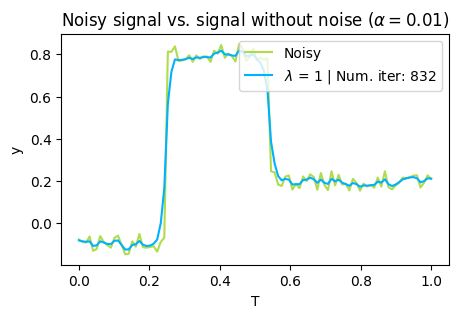

In [59]:
#--------------------------> Parameters
x0=np.zeros(len(y))
lambd=1
alpha=0.01

#--------------------------> Method implementation
x,n, cvg=gradient_met(grad_f(y,lambd), x0, alpha, eps, Nmax)

#--------------------------> Graph
plt.figure(figsize=(5, 3))  
plt.plot(t,y,color="#8fce00",label="Noisy",alpha=0.7)
plt.xlabel("T")
plt.ylabel("y")
plt.plot(t,x,color="#00b1fe",label=fr"$\lambda$ = {lambd} | Num. iter: {n}")
plt.title(fr"Noisy signal vs. signal without noise ($\alpha = {alpha }$)")
plt.legend(loc='upper right')
plt.show()

### <font color=#80B900> **1.6.** </font>
Implementation using the following parameters:
*   **Function**: $f(x)$
*   **Regularization weight**: $\lambda = 1$
*   **Method**: Fixed Step Gradient 
    * $x_0=0$
    * $\alpha = 0.5$

<ipython-input-53-863e5d00e36e>:4: RuntimeWarning: overflow encountered in matmul
  return x-y+lambd*((D_mat(N)).T)@D_mat(N)@x
<ipython-input-53-863e5d00e36e>:4: RuntimeWarning: overflow encountered in add
  return x-y+lambd*((D_mat(N)).T)@D_mat(N)@x
<ipython-input-53-863e5d00e36e>:4: RuntimeWarning: invalid value encountered in matmul
  return x-y+lambd*((D_mat(N)).T)@D_mat(N)@x


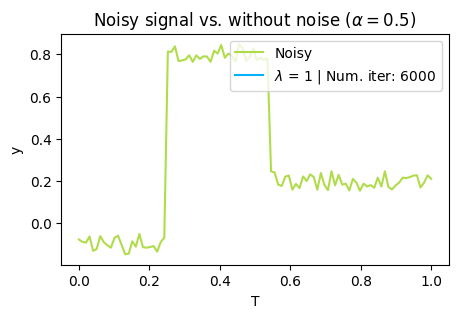

In [60]:
#--------------------------> Parameters
x0=np.zeros(len(y))
lambd=1 
alpha=0.5

#--------------------------> Method implementation
x,n, cvg =gradient_met(grad_f(y,lambd), x0, alpha, eps, Nmax)

#--------------------------> Graph
plt.figure(figsize=(5, 3))  
plt.plot(t,y,color="#8fce00",label="Noisy",alpha=0.7)
plt.plot(t,x,color="#00b1fe",label=fr"$\lambda$ = {lambd} | Num. iter: {n}")
plt.xlabel("T")
plt.ylabel("y")
plt.title(fr"Noisy signal vs. without noise ($\alpha = {alpha }$)")
plt.legend(loc='upper right')
plt.show()

<font color=#80B900>**Comment:** </font>

When alpha is increased from $0.01$ to $0.5$, the algorithm overshoots the optimal solution and fails to converge. This is because the algorithm may jump over the minimum point in the cost function, leading to oscillations or divergence instead of convergence. It was not expected as $0.5$ does not seem a large step value.

### <font color=#80B900> **1.7.** </font>


Implementation using the following parameters:
*   **Function**: $f(x)$
*   **Regularization weight**: $\lambda \in \left\{ 1,2,3,4 \right\}$
*   **Method**: Fixed Step Gradient 
    *  $x_0=0$
    *  $\alpha = 0.01$

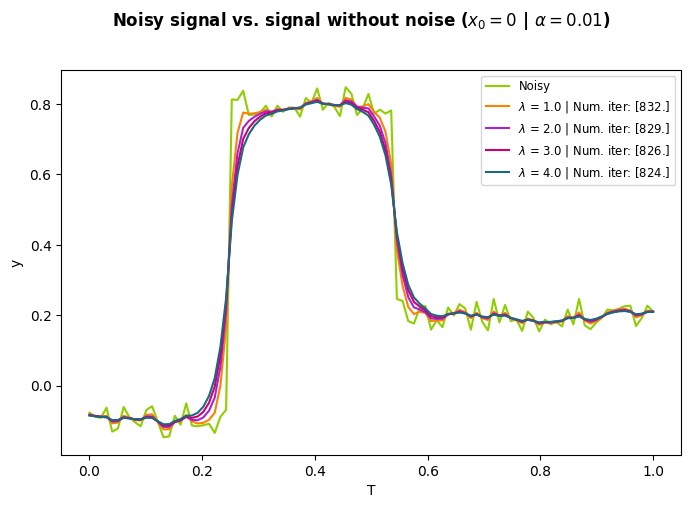

In [61]:
#--------------------------> Parameters
x0=np.zeros(len(y))
lambd=np.linspace(1,4,4)
alpha=0.01 

#--------------------------> Method implementation
x_lambd=np.zeros((len(lambd),N)) 
n_lambd=np.zeros((len(lambd),1)) 

for index,i in enumerate(lambd):
  x,n, cvg =gradient_met(grad_f(y,i), x0, alpha, eps, Nmax)
  x_lambd[index]=x
  n_lambd[index]=n

#--------------------------> Graph
title=fr"Noisy signal vs. signal without noise ($x_0={x0[0]:.0f}$ | $\alpha = {alpha }$)"
fig, ax1 = plt.subplots(figsize=(8, 5))
summary_plot(x_lambd,n_lambd,lambd,t,y,title,ax1,0)

<font color=#80B900>**Comment:** </font> 

The peaks in the solutions are reduced, although some overfitting still persists in relation to the original noisy signal. As the value of lambda increases, fewer iterations are required, and the signal without noisy becomes smoother.

###<font color=#80B900> **1.8.** </font>
The new cost function:

$$f_\mu(x)=\frac{1}{2}\sum_{i=1}^{N}(x_i - y_i)^2+ \lambda \sum_{i=1}^{N-1} \sqrt{(x_{i+1}-x_i)^2 + \mu^2}$$

$f_\mu(x)$  is differentiable:

\begin{array}{rcl}
f_\mu(x+h) & = & \frac{1}{2}\sum_{i=1}^{N}(x_i+h_i - y_i)^2 + \lambda \sum_{i=1}^{N-1} \sqrt{(x_{i+1}+h_{i+1}-x_i-h_i)^2 + \mu^2} \\
 & = & f_\mu(x)+\left\langle (x-y),h \right\rangle+\lambda\sum_{i=1}^{N-1}\frac{(x_{i+1}-x_i)(h_{i+1}-h_i)}{\sqrt{(x_{i+1}-x_i)^2+\mu^2}} 
 +O(\left\| h \right\|^2)\\
 & = & f_\mu(x)+\left\langle (x-y),h \right\rangle+\lambda\left\langle \frac{Dx}{\sqrt{(Dx)^{**2}+ \mu^2 \overrightarrow{1}}},Dh \right\rangle 
 +O(\left\| h \right\|^2)\\
 & = & f_\mu(x)+\left\langle  \color{#80B900}{x-y+\lambda D ^\text{T}\cdot \left( \frac{Dx}{\sqrt{(Dx)^{**2}+ \mu^2 \overrightarrow{1}}} \right)},h \right\rangle  
 +O(\left\| h \right\|^2) \\
 &=& f_\mu(x)+\color{#80B900}{df_\mu(x)}\cdot h+O(\left\| h \right\|^2)
\end{array}

therefore, the gradient of the function $f_\mu(x)$ is:

$$df_\mu(x) = \nabla f_\mu(x) =x-y+\lambda D ^\text{T}\cdot \left( \frac{Dx}{\sqrt{(Dx)^{**2}+ \mu^2 \overrightarrow{1}}} \right)$$

where $\frac{Dx}{\sqrt{(Dx)^{**2}+ \mu^2 \overrightarrow{1}}}$ represents elementwise division of the corresponding elements of vectors in the numerator and denominator. The symbol $\sqrt{\cdot}$ denotes the square root elementwise operation, and $(Dx)^{**2}$ represents elementwise squaring of the elements of the vector $Dx$. $\overrightarrow{1}$ represents a vector of ones with the same dimensionality as $Dx$.

In [62]:
def grad_f_mu(y,lambd,mu):
  def grad_f_mu_(x):
    N=x.size
    D=D_mat(N)
    mu_=np.ones(N-1)*(mu**2)
    Dx=D@x
    Dx_=1/np.sqrt(Dx**2+mu_)
    return x-y+lambd*(D.T@(Dx*Dx_))
  return grad_f_mu_

### <font color=#80B900> **1.9.** </font>
Implementation using the following parameters:
*   **Function**: $f_\mu(x)$
*   **Regularization weight**: 
    * 
  $\lambda \in \left\{ 1,2,3,4 \right\}$
    * $\mu = 0.01$
*   **Method**: Fixed Step Gradient 
    * $x_0=0$
    * $\color{#80B900}{\alpha = 0.001}$

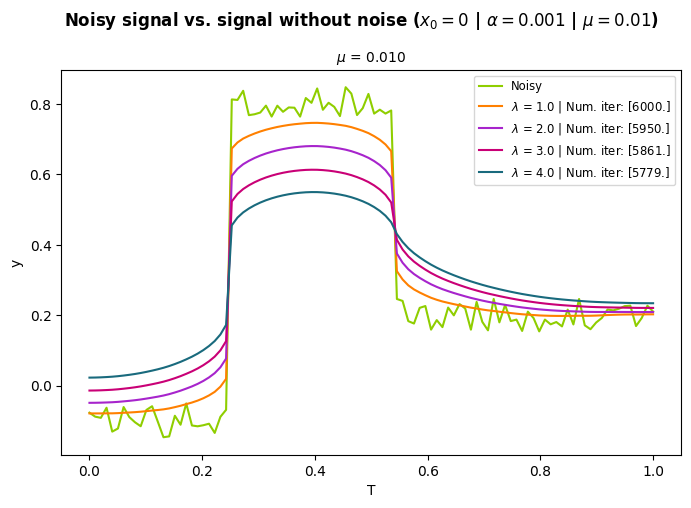

In [63]:
#--------------------------> Parameters
x0=np.zeros(len(y))
lambd=np.linspace(1,4,4)
mu=0.01
alpha=0.001

#--------------------------> Method implementation
x_lambd=np.zeros((len(lambd),N)) 
n_lambd=np.zeros((len(lambd),1)) 

for index,i in enumerate(lambd):
  x,n, cvg =gradient_met(grad_f_mu(y,i,mu), x0, alpha, eps, Nmax)
  x_lambd[index]=x
  n_lambd[index]=n

#--------------------------> Graph
title=fr"Noisy signal vs. signal without noise ($x_0={x0[0]:.0f}$ | $\alpha = {alpha}$ | $\mu = {mu}$)"
fig, ax1 = plt.subplots(figsize=(8, 5))
summary_plot(x_lambd,n_lambd,lambd,t,y,title,ax1,mu)

<font color="#80B900"><b>Comment:</b></font>

It's important to highlight that the value of <font color="#80B900">$\alpha$</font> decreased by over 90%. Compared to the previous regularization (1.7), the new cost function results in a smoother overall signal. Notice that the jumps at <code>T=t1</code> and <code>T=t2</code> (defined in the signal construction) are largely reduced as lambda increases. However, more iterations are required to achieve convergence.

### <font color=#80B900> **1.10.** </font>


Step for Barzilai-Borwein method:
$$ \alpha_k = \frac{\left\langle \Delta g_k, \Delta x_k  \right\rangle}{\left\| \Delta g_k \right\| ^2} $$
where:
*  $\Delta x_k = x_{k} -x_{k-1}  $
*  $\Delta g(x_k) = \nabla  f(x_{k}) - \nabla f(x_{k-1})  $


In [64]:
def BBstep(grad_f, x, xm1) :
  """
  grad_f a function that compute the gradient of f given x
  x the initialization point x_0
  xm1 the initialization point x_-1
  """
  delta_x=x-xm1
  delta_grad=grad_f(x)-grad_f(xm1)
  
  delta_x=mat_to_vet (delta_x)          # mat_to_vet 
  delta_grad= mat_to_vet (delta_grad)

  bbs=np.dot(delta_grad,delta_x)/norm(delta_grad, ord=2)**2
  return bbs
  #  return bbs #  the step in the method of Barzilai-Borwein

The **Barzilai-Borwein** method:
$$x_{k+1}=x_k - \color{#80B900}{\alpha_k} \nabla f(x_k)$$

In [65]:
def barzilai_borwein(grad_f, x0, eps, Nmax):
  """
  grad_f a function that compute the gradient of f given x
  x0 the initialization
  eps the precision (stop criteria)
  Nmax the maximum number of iterations
  """
  x=x0
  xm1=-x0 #Following the suggestion
  cvg=False
  for i in range(Nmax):  
    x_new=x-BBstep(grad_f, x, xm1)*grad_f(x)
    stop = norm(mat_to_vet(x_new-x), ord=2) # "mat_to_vet" Converts a matrix into a vector
    xm1 = x
    x = x_new
    n=i+1
    if stop < eps:
        cvg=True
        break

  return x, n, cvg 
  # returns
  # x the minimum,
  # n the number of iterations
  # cvg a boolean that indicates if the algorithm has converged

Implementation using the following parameters:
*   **Function**: $f_\mu(x)$
*   **Regularization weight**: 
    * 
  $\lambda \in \left\{ 1,2,3,4 \right\}$
    * 
  $\mu \in \left\{0.001, 0.01, 1\right\}$
*   **Method**: Barzilai-Borwein with $x_0$ ~ $U[0.5,1.0]$

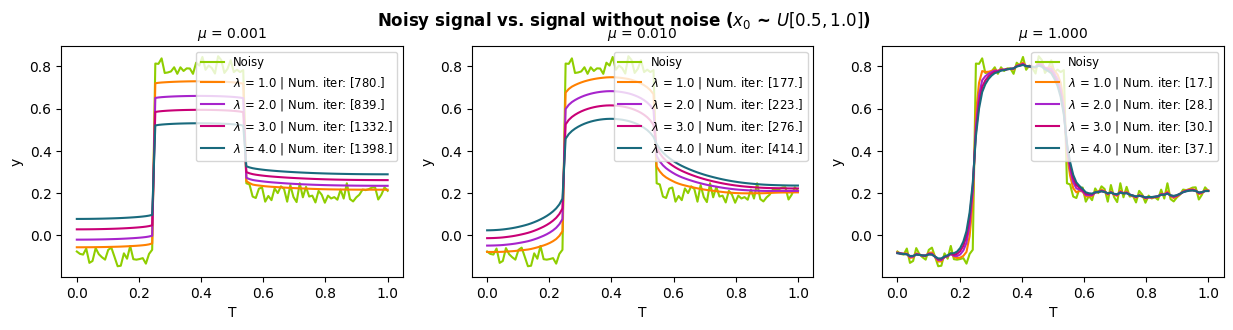

In [66]:
mu_vec = np.array([0.001, 0.01, 1])

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))

for index, (ax_, mu_) in enumerate(zip(axs,mu_vec)):
    #--------------------------> Parameters
    x0 =  np.random.uniform(low=0.5, high=1.0, size=y.shape)
    lambd=np.linspace(1,4,4)
    mu=mu_

    #--------------------------> Method implementation
    x_lambd=np.zeros((len(lambd),N)) 
    n_lambd=np.zeros((len(lambd),1)) 

    for index,i in enumerate(lambd):
      x,n, cvg =barzilai_borwein(grad_f_mu(y,i,mu), x0, eps, Nmax)
      x_lambd[index]=x
      n_lambd[index]=n

    #--------------------------> Graph
    title=fr"Noisy signal vs. signal without noise ($x_0$ ~ $U[0.5,1.0]$)"
    summary_plot(x_lambd,n_lambd,lambd,t,y,title,ax_,mu)

<font color="#80B900"><b>Comment:</b></font>

When $\mu=0.01$, the obtained signals are similar to those in (1.9). However, there is a significant reduction of around 95% in the number of iterations.

When varying $\mu$, the following observations are made:
* The signals become smoother as the value of $\mu$ decreases. When $\mu=1.0$, they are very similar to those in (1.7) from the cost function $f(x)$ in (1.1), but with a much smaller number of iterations.
* The number of iterations increases as $\mu$ decreases.
*Among the three values tested, $\mu=0.01$ achieves good noise reduction with a reasonable number of iterations. This suggests the existence of an optimal value of $\mu$ between 0 and 1 in terms of balancing smoothness and number of iterations.

# <font color=#80B900> **Exercise 2:** Remove noise from an image </font>

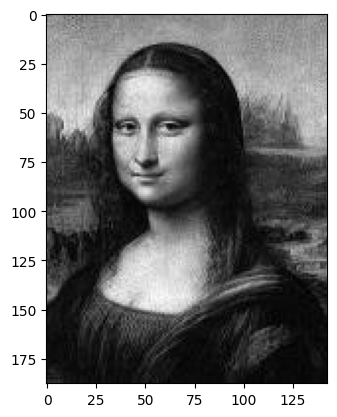

In [22]:
from matplotlib.image import imread
image = imread("Grey_Mona_lisa.jpg")

#convert to array
imageArray = np.asarray(image,dtype=np.float64)[:,:,0].copy()/255. 

# plot with grey levels
plt.imshow(imageArray, cmap="gray")

g = imageArray.copy()

arrays_2D=[imageArray]
titles=["Original"]

### <font color=#80B900> **2.1.** </font>
The finite difference in $x$ - direction 

$(\delta_x v )_{i,j} = \left\{ \begin{array}{cl}
v_{i+1,j} - v_{i,j} & \text{if } i \neq m \\
0 & \text{otherwise}
\end{array} \right.$

In [23]:
def dx_derivative(m):
  """
  m: row of matriz u
  """
  zeros_col = np.zeros((1, m))
  delta_x= np.append(D_mat(m), zeros_col, axis=0)
  return delta_x #A matrix that, when multiplied with a matrix of m columns, returns its x-direction matrix for discrete gradient

The finite difference in $y$ - direction 

$(\delta_y v )_{i,j} = \left\{ \begin{array}{cl}
v_{i,j+1} - v_{i,j} & \text{if } i \neq m \\
0 & \text{otherwise}
\end{array} \right.$

In [24]:
def dy_derivative(n):
  """
  n: columns of matriz v
  """
  zeros_row = np.zeros((n,1))
  delta_y = np.append(D_mat(n).T, zeros_row, axis=1)
  return delta_y  #A matrix that, when multiplied with a matrix of n columns, returns its y-direction matrix for discrete gradient 

The finite differences for the image `Grey_Mona_lisa.jpg` are

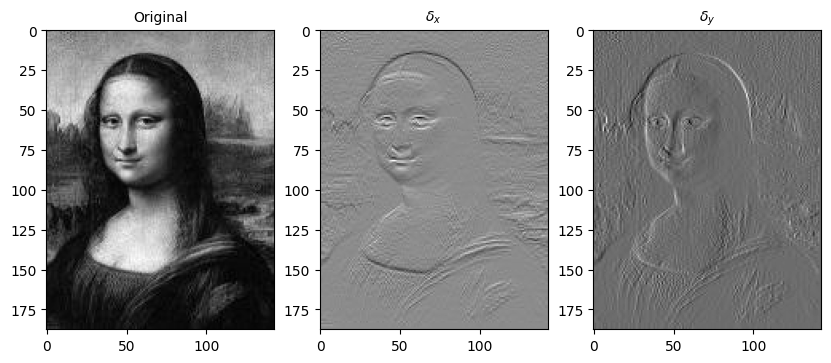

In [25]:
dx_imageArray = np.dot(dx_derivative(imageArray.shape[0]), imageArray)
dy_imageArray = np.dot(imageArray,dy_derivative(imageArray.shape[1]))

arrays_2D.append(dx_imageArray)
titles.append(fr"$\delta_x$")

arrays_2D.append(dy_imageArray)
titles.append(fr"$\delta_y$")

summary_plot_2D(arrays_2D,titles)

### <font color=#80B900> **2.2.** </font>
The norm of the discrete gradient  $M=\left\| \nabla ^{\text{d}} v \right\| \in \mathcal{M}_{m,n}(\mathbb{R})$ is defined by:


$$M_{i,j} (v) =\sqrt{(\delta_x v)_{i,j}^2 + (\delta_y v)_{i,j}^2}$$

In [26]:
def M_matriz(v):
  """
  v : matrix m x n
  """
  dx_v = np.dot(dx_derivative(v.shape[0]),v)
  dy_v = np.dot(v,dy_derivative(v.shape[1]))
  return np.sqrt((dx_v)**2+(dy_v)**2) #Matriz M

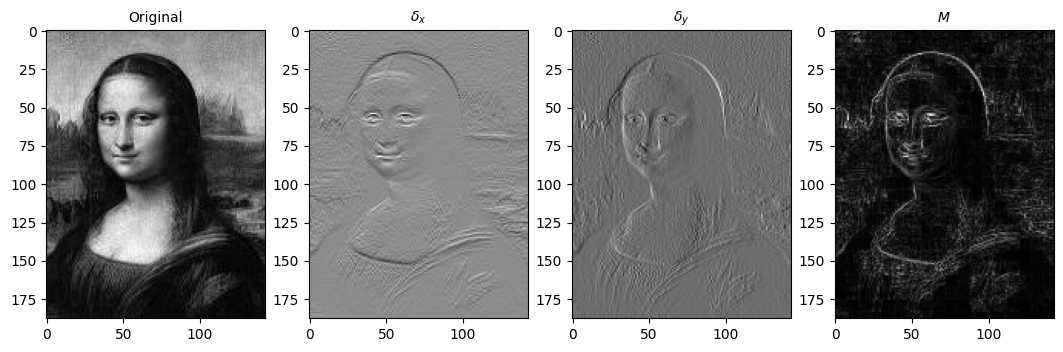

In [27]:
arrays_2D.append(M_matriz(imageArray))
titles.append(fr"$M$")

summary_plot_2D(arrays_2D,titles)

<font color=#80B900>**Comment:** </font> 

The image generated by *the norm of the discrete gradient* is a graph with a black background. It highlights in white the points that are relevant, i.e., the extreme colors close to white or black in the discrete derivatives ($\delta_x$ and $\delta_y$)

<font color=#80B900> ===================================================================================================================</font>

In **exercise 2**, the following parameters are kept constant and will not be modified:

*   Stop criterion: $\left| x_{k+1}-x_k \right| \le \epsilon$
*   Precision: $\epsilon = 1e-5$
*   Maximum number of iterations: $2.000$
*   $x_0$ ~ $U[0.5,1.0]$

At this point, we will use only the *Method Barzilai-Borwein*.

In [28]:
eps=1e-5 
Nmax= 2000

The following dataframe will store the outcomes that will be discussed at the end of each image:

In [29]:
results=pd.DataFrame(columns=["Function",
                              "mu",
                              "lambd",
                              "value in v^*",
                              "num. iter",                           
                              "L2(orig,v^*)"])

Given two images $\text{img1}$ and $\text{img2}$, their difference is mesured by the $L2$ distance:

$$L2(\text{img1},\text{img2})=\sqrt{\frac{\sum_{i}^{m} \sum_{j}^{n} \left( \text{img1}_{i,j}-\text{img2}_{i,j} \right)^2}{m \times n}}$$

In [30]:
def img_diff(img1,img2):
  """
  img1 : array image 1
  img2 : array image 2
  Both of equal size.
  """
  diff = (img1 - img2)
  diff_cuad = (img1 - img2) ** 2
  dim_img1 =(img1.shape[0] * img1.shape[1])
  # L2
  d2 = np.sqrt(np.sum(diff_cuad) / dim_img1)
  return "{:.3f}".format(d2) 

<font color=#80B900> ===================================================================================================================</font>

### <font color=#80B900> **2.3.** </font>
The objective is to find $v^*$ in the optimization problem:

$$ v^*=\arg\min_{v \in \mathbb{R}^{m \times n}} J(v)$$

through <font color=#80B900> the Barzilai-Borwein method </font>. The function $J(v)$ is defined by
\begin{align*}
J(v)&=\frac{1}{2} \left\| v-g \right\|^2 + \frac{\lambda}{2} \left\| \nabla ^\text{d} v\right\|^2\\ 
&= \frac{1}{2} \left\| v-g \right\|^2 + \frac{\lambda}{2}
\left\{ \left\|  \delta_x v \right\|^2 + \left\|\delta_y v\right\|^2 \right\}
\end{align*}
   

 $J: \mathbb{R}^{m \times n} \longrightarrow \mathbb{R} \cup \{ \infty  \}$.

In [31]:
def J(g,lamb):
  def J_(v):
    dx      = dx_derivative(v.shape[0])
    dx_v    = dx@v
    nor_dx_v= norm(dx_v, ord="fro")**2

    dy      = dy_derivative(v.shape[1])
    dy_v    = v@dy
    nor_dy_v= norm(dy_v, ord="fro")**2

    nor_diff=norm(v-g, ord="fro")**2
    
    return 1/2*nor_diff + lamb/2*(nor_dx_v+nor_dy_v)
  return J_

$J$ is differentiable, and the derivative is:

$$dJ(v)=v-g+\lambda \left( (\delta_x^T \delta_x v) + ( v \delta_y \delta_y^T)\right) $$

Prior definition of the values of $g$ and $\lambda$ is required to calculate $dJ(v)$, then, to compute the derivative, `grad_J(g, lambd)(v)` is executed.

In [32]:
def grad_J(g,lambd):
  def grad_J_(v):
    dx=dx_derivative(v.shape[0])
    dy=dy_derivative(v.shape[1])
    dx_v = dx.T@dx@v
    dy_v = v@dy@dy.T
    return v-g+lambd*(dx_v + dy_v)
  return grad_J_

Implementation using the following parameters:
*   **Function**: $J(v)$
*   **Regularization weight**: $\lambda \in \left\{ 1,10,20,30 \right\}$
*   **Method**: Barzilai-Borwein

Method BB with $J(v)$


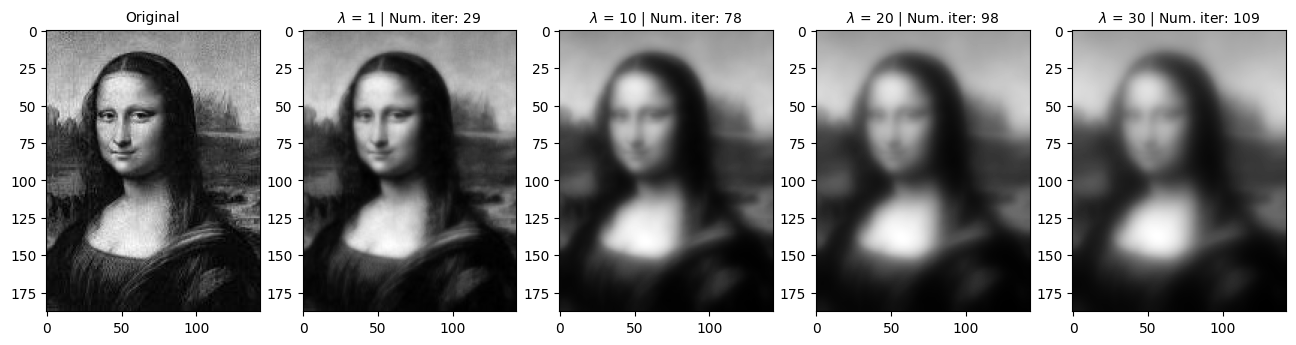

In [33]:
#--------------------------> Parameters
x0 =  np.random.uniform(low=0.5, high=1.0, size=g.shape)
lambd=[1, 10, 20,30]

#--------------------------> Method implementation
arrays_2D = [g]
titles    = ["Original"]

for index,i in enumerate(lambd):
  x,n, cvg =barzilai_borwein(grad_J(g,i), x0, eps, Nmax)
  arrays_2D.append(x)
  titles.append(fr"$\lambda$ = {i:.0f} | Num. iter: {n}")
  
  # Saving results to a dataframe
  d2 = img_diff(imageArray,x)
  cost = J(g,i)(x)
  
  values=["J(v)",0,fr"{i:.0f}",fr"{cost:.2f}",n,d2]
  results.loc[len(results)]=values

#--------------------------> Graph
print(fr'Method BB with $J(v)$')
summary_plot_2D(arrays_2D,titles)

<font color=#80B900>**Comment:** </font> 

As lambda increases, the image $v^*$ becomes more uniform and the transitions between different shades of gray become smoother. The changes in grayscale become less abrupt. Additionally, the higher the value of lambda, the greater the number of iterations required to achieve the result.

### <font color=#80B900> **2.4.** </font>

The function that increases the penalty, $J_\mu(v)$, is defined as :

$$J_\mu(v)=\frac{1}{2}\left\| v-g \right\|^2 + \lambda \sqrt{\left\| \delta_x v +\mu^2 \text{1}_{m \times n} \right\|^2 +\left\| v \delta_y+\mu^2 \text{1}_{m \times n}\right\|^2}$$




In [34]:
def J_mu(g,lambd,mu):
  def J_mu_(v):
    mu_=np.ones_like(g)*(mu**2)

    dx      = dx_derivative(v.shape[0])
    dx_v    = dx@v
    nor_dx_v= norm(dx_v+mu_, ord="fro")**2

    dy      = dy_derivative(v.shape[1])
    dy_v    = v@dy
    nor_dy_v= norm(dy_v+mu_, ord="fro")**2
    
    nor_diff=norm(v-g, ord="fro")**2
    

    return 1/2*nor_diff+lambd*np.sqrt(nor_dx_v+nor_dy_v+mu**2)
  return J_mu_

and the derivative of the function  $J_\mu(v)$  is:

$$\nabla J_\mu(v)=v-g+\frac{\lambda \left( (\delta_x^T \delta_x v)+(\delta_x^T \cdot \mu^2 \text{1}_{m \times n}) + ( v \delta_y \delta_y^T)+(\mu^2 \text{1}_{m \times n} \cdot \delta_y)\right) }{\sqrt{\left\| \delta_x v +\mu^2 \text{1}_{m \times n} \right\|^2 +\left\| v \delta_y+\mu^2 \text{1}_{m \times n}\right\|^2}}$$

Prior definition of the values of $g$ and $\lambda$ is required to calculate $dJ_\mu(v)$, then, to compute the derivative, `grad_J_mu(g, lambd)(v)` is executed.

In [35]:
def grad_J_mu(g,lambd,mu):
  def grad_J_mu_(v):
    mu_=np.ones_like(g)*(mu**2)

    dx      = dx_derivative(v.shape[0])
    dx_v    = dx@v
    nor_dx_v= norm(dx_v+mu_, ord="fro")**2

    dy      = dy_derivative(v.shape[1])
    dy_v    = v@dy
    nor_dy_v= norm(dy_v+mu_, ord="fro")**2
    
    nor_diff=norm(v-g, ord="fro")**2
       
    return v-g+lambd*(dx.T@dx_v +dx.T@mu_+ dy_v@dy.T+mu_@dy)/(np.sqrt(nor_dx_v+nor_dy_v))
  return grad_J_mu_

Implementation using the following parameters:
*   **Function**: $J_\mu(v)$
*   **Regularization weight**: 
    * 
  $\lambda \in \left\{1, 10,20,30 \right\}$
    * 
  $\mu \in \left\{0.001, 0.01,1 \right\}$
*   **Method**: Barzilai-Borwein

Method BB with $J_\mu(v)$ ($\mu$: 0.001)


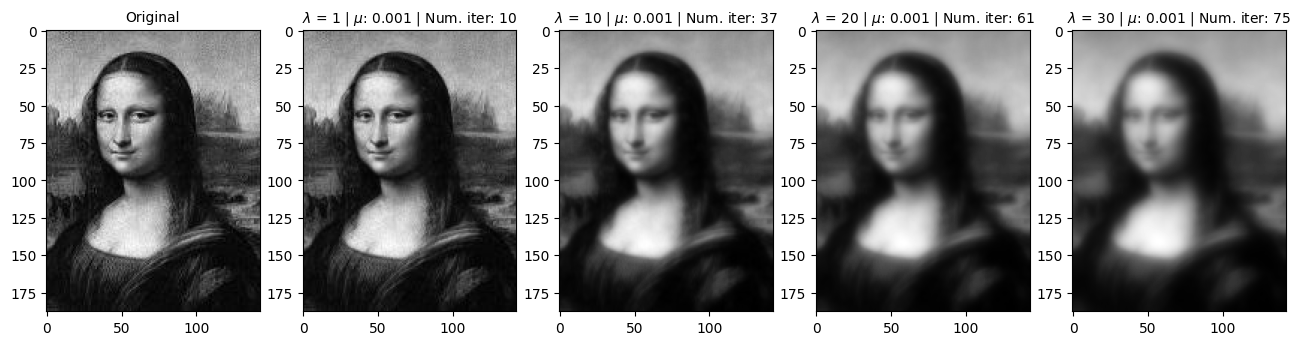

Method BB with $J_\mu(v)$ ($\mu$: 0.010)


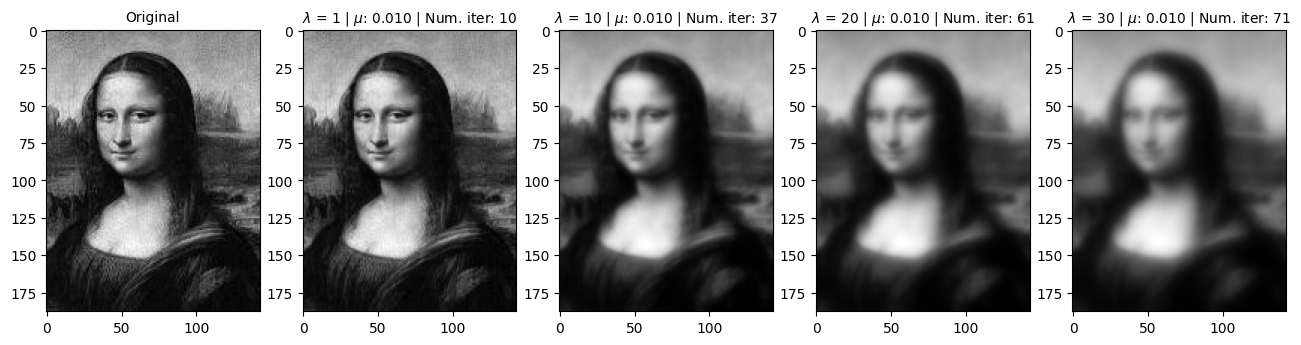

Method BB with $J_\mu(v)$ ($\mu$: 1.000)


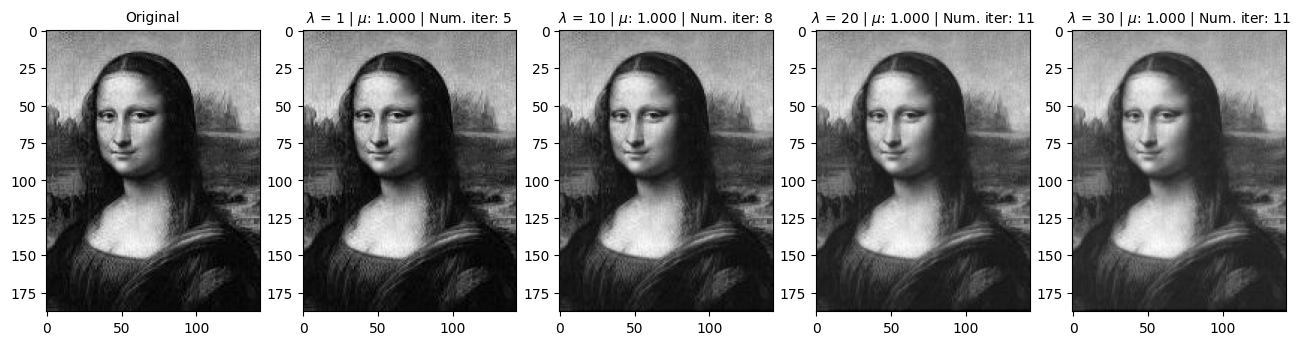

In [36]:
#--------------------------> Parameters
lambd=[1, 10, 20,30]
mu_range=[0.001, 0.01, 1]

for mu_ in mu_range:
  mu=mu_
  #--------------------------> Method implementation
  arrays_2D = [g]
  titles    = ["Original"]

  for index,i in enumerate(lambd):
    x,n, cvg =barzilai_borwein(grad_J_mu(g,i,mu), x0, eps, Nmax)
    arrays_2D.append(x)
    titles.append(fr"$\lambda$ = {i:.0f} | $\mu$: {mu:.3f} | Num. iter: {n}")

    # Saving results to a dataframe
    d2 = img_diff(imageArray,x)
    cost = J_mu(g,i,mu)(x)
    values=["J_mu(v)",mu,fr"{i:.0f}",fr"{cost:.2f}",n,d2]
    results.loc[len(results)]=values

  #--------------------------> Graph
  print(fr'Method BB with $J_\mu(v)$ ($\mu$: {mu:.3f})')
  summary_plot_2D(arrays_2D,titles)

The following table displays the results of the minimization algorithms for $J(v)$ and $J_\mu(v)$, including the number of iterations, value of $J(v^*)$ and $J_\mu(v^*)$ and the values of the  metric $L2(g=\text{original},v^*)$, while varying the parameters $\lambda$ and $\mu$.

These results enable us to evaluate the performance of the algorithms used in the minimization process.

In [37]:
results

Function     mu lambd value in v^*  num. iter L2(orig,v^*)
0      J(v)  0.000     1        31.03         29        0.032
1      J(v)  0.000    10       103.32         78        0.063
2      J(v)  0.000    20       144.02         98        0.076
3      J(v)  0.000    30       173.33        109        0.084
4   J_mu(v)  0.001     1        11.54         10        0.009
5   J_mu(v)  0.001    10        70.31         37        0.040
6   J_mu(v)  0.001    20       112.96         61        0.052
7   J_mu(v)  0.001    30       148.08         75        0.061
8   J_mu(v)  0.010     1        11.54         10        0.009
9   J_mu(v)  0.010    10        70.30         37        0.040
10  J_mu(v)  0.010    20       112.93         61        0.052
11  J_mu(v)  0.010    30       148.03         71        0.061
12  J_mu(v)  1.000     1       232.00          5        0.001
13  J_mu(v)  1.000    10      2319.43          8        0.007
14  J_mu(v)  1.000    20      4637.83         11        0.012
15  J_mu(v)  1.000    30      6955.42         11        0.017

<font color=#80B900> **Comment:** </font>

The results of $J(v)$ show that the distance between $v^*$ and $g$ increases as $\lambda$ increases. It follows that <font color=#80B900> the image becomes more uniform and the transitions between different shades of gray become smoother</font> as desired for denoising.

The results of $J_\mu(v)$ are as follows:

*  When $\mu=1$, $v^*$ preserves much of the characteristics of $g$, which is contrary to the main objective of denoising. $L2$ distance attains the lowest values.
* Distances and number of iterations are very similar when $\mu=0.01$ and $\mu=0.001$. In both cases, the distance between $v^*$ and $g$ is increasing in $\lambda$. Compared to $J(v)$, the distances are slightly smaller, and the solutions require fewer iterations.

### <font color=#80B900> **2.5.** </font>

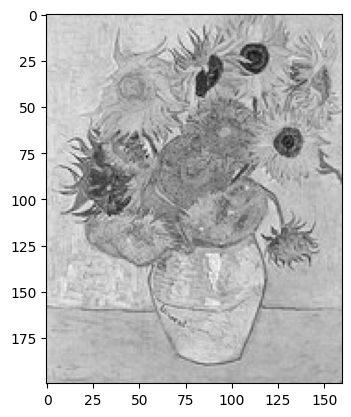

In [38]:
#image = imread("Grey_Mona_lisa.jpg")
image = imread("sunflowers.jpg")

#convert to array
imageArray = np.asarray(image,dtype=np.float64)[:,:,0].copy()/255. 

# plot with grey levels
plt.imshow(imageArray, cmap="gray")

g = imageArray.copy()

arrays_2D=[g]
titles=["Original"]

results = results.drop(results.index) #new analysis

In [39]:

scale_=0.1 # noise scale

# Generate random noise with the same shape as the image
noise = np.random.normal(scale=scale_, size=imageArray.shape)

# Add the noise to the image
imageArray_noise = imageArray + noise

# Clip the pixel values to the valid range [0, 1]
imageArray_noise = np.clip(imageArray_noise, 0, 1)
title_noise=fr"Noise ~ $N(0,{scale_})$"

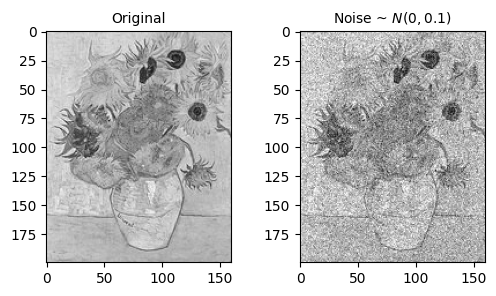

In [40]:
#--------------------------> Graph
arrays_2D.append(imageArray_noise)
titles.append(title_noise)
summary_plot_2D(arrays_2D,titles)

We measure the difference between the original image and the noise by the L2 norm:

In [41]:
d2=img_diff(imageArray,imageArray_noise)
print("Diff L2: ",d2)

Diff L2:  0.099


The distance is consistent with the scale of the noise.

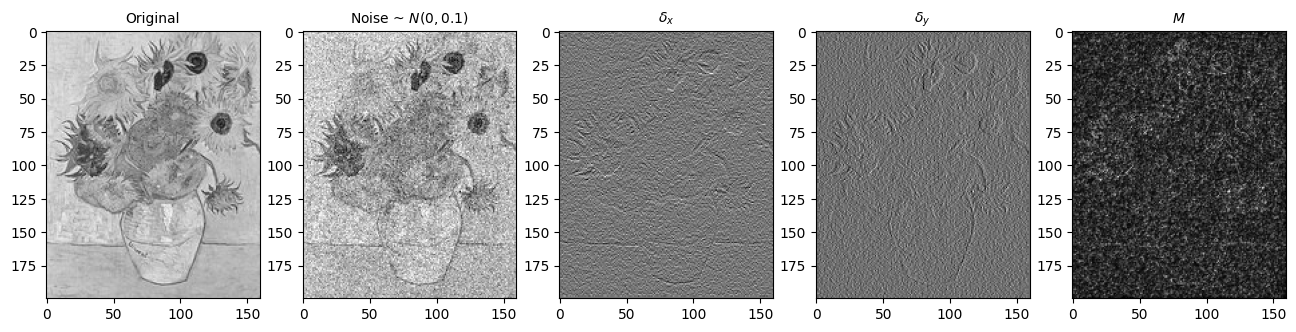

In [42]:
dx_imageArray = np.dot(dx_derivative(imageArray_noise.shape[0]), imageArray_noise)
dy_imageArray = np.dot(imageArray_noise,dy_derivative(imageArray_noise.shape[1]))

arrays_2D.append(dx_imageArray)
titles.append(fr"$\delta_x$")

arrays_2D.append(dy_imageArray)
titles.append(fr"$\delta_y$")

#--------------------------> Graph
arrays_2D.append(M_matriz(imageArray_noise))
titles.append(fr"$M$")
summary_plot_2D(arrays_2D,titles)

Implementation using the following parameters:
*   **Function**: $J(v)$
*   **Regularization weight**: $\lambda \in \left\{ 1,10,20,30 \right\}$
*   **Method**: Barzilai-Borwein

Method BB with $J(v)$


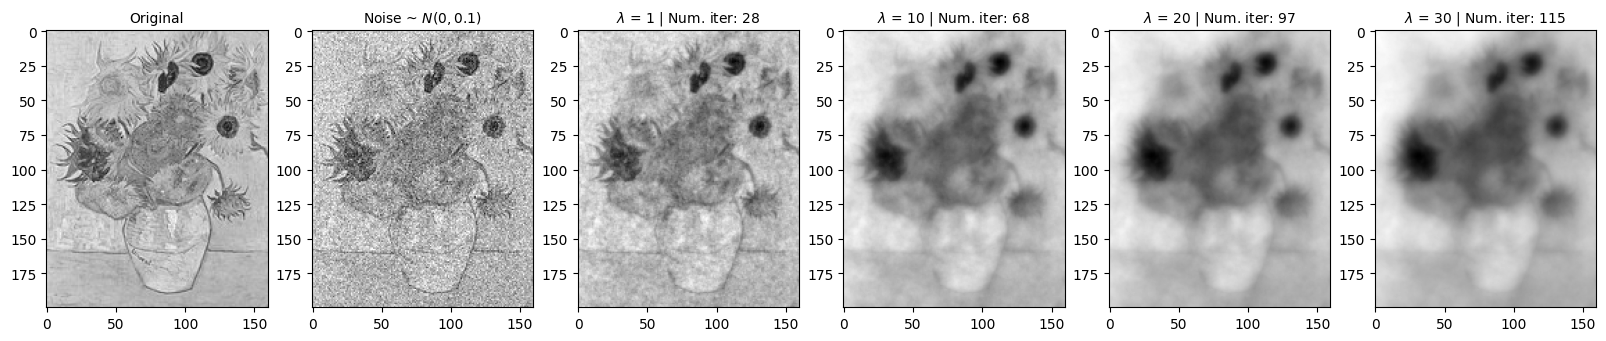

In [43]:
#--------------------------> Parameters
x0 =  np.random.uniform(low=0.5, high=1.0, size=g.shape)
lambd=[1, 10, 20,30]

#--------------------------> Method implementation
arrays_2D = [g,imageArray_noise]
titles    = ["Original",title_noise]

for index,i in enumerate(lambd):
  x,n, cvg =barzilai_borwein(grad_J(imageArray_noise,i), x0, eps, Nmax)
  arrays_2D.append(x)
  titles.append(fr"$\lambda$ = {i:.0f} | Num. iter: {n}")
  
  # Saving results to a dataframe
  d2 = img_diff(imageArray,x)
  cost = J(g,i)(x)

  values=["J(v)",0,fr"{i:.0f}",fr"{cost:.2f}",n,d2]
  results.loc[len(results)]=values

#--------------------------> Graph
print(fr'Method BB with $J(v)$')
summary_plot_2D(arrays_2D,titles)


Implementation using the following parameters:
*   **Function**: $J_\mu(v)$
*   **Regularization weight**: 
    * 
  $\lambda \in \left\{1,10,20,30 \right\}$
    * $\mu =0.001$  
*   **Method**: Barzilai-Borwein

Method BB with $J_\mu(v)$ ($\mu$: 0.001)


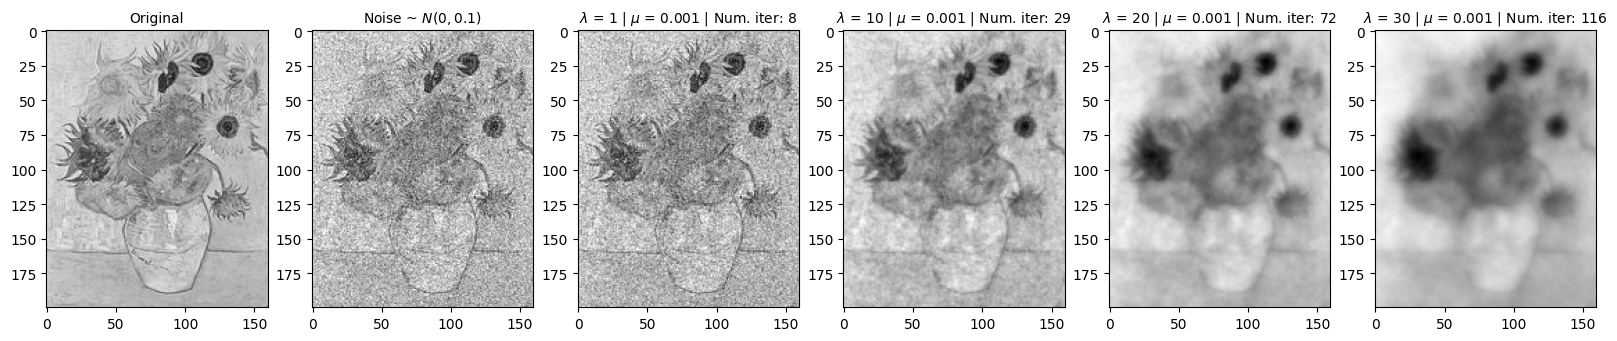

In [44]:
#--------------------------> Parameters
lambd=[1, 10, 20,30]
mu=0.001

#--------------------------> Method implementation
arrays_2D = [g,imageArray_noise]
titles    = ["Original",title_noise]


for index,i in enumerate(lambd):
  x,n, cvg =barzilai_borwein(grad_J_mu(imageArray_noise,i,mu), x0, eps, Nmax)
  arrays_2D.append(x)
  titles.append(fr"$\lambda$ = {i:.0f} | $\mu$ = {mu:.3f} | Num. iter: {n}")

  # Saving results to a dataframe
  d2 = img_diff(imageArray,x)
  cost = J_mu(g,i,mu)(x)
  values=["J_mu(v)",mu,fr"{i:.0f}",fr"{cost:.2f}",n,d2]
  results.loc[len(results)]=values

#--------------------------> Graph

print(fr'Method BB with $J_\mu(v)$ ($\mu$: {mu:.3f})')
summary_plot_2D(arrays_2D,titles) 

In [45]:
results

Function     mu lambd value in v^*  num. iter L2(orig,v^*)
0     J(v)  0.000     1        90.86         28        0.054
1     J(v)  0.000    10        99.25         68        0.069
2     J(v)  0.000    20       108.60         97        0.074
3     J(v)  0.000    30       114.90        115        0.077
4  J_mu(v)  0.001     1       164.13          8        0.090
5  J_mu(v)  0.001    10       131.08         29        0.055
6  J_mu(v)  0.001    20       121.36         72        0.067
7  J_mu(v)  0.001    30       130.81        116        0.074

<font color=#80B900> **Comment:** </font>

According to (2.4), it is not necessary to consider $μ = 0.01$ because the results are quite similar to the ones from $μ = 0.001$. When adding Gaussian noise to the original image, <font color=#80B900> good denoising implies a small distance between the solution and the original image</font>, which should be close to zero.

For $J(v)$, the distance increases with increasing $\lambda$ values, which implies that the best denoising occurs when $\lambda = 1$.
For $J_\mu(v)$, the distance displays a U-shape, and thus the best denoising occurs when $λ = 10$. This suggests an optimal value of $λ$ around that value.